# Group Project 2 (Part III)
## Data Feature and Model Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Feature Before Data Cleaning

In [2]:
df_raw = pd.read_csv("DiD_data1.csv")
rssd = df_raw["rssd9001"].unique()
print(rssd[0:5])

[1020180. 1020201. 1020340. 1020395. 1020582.]


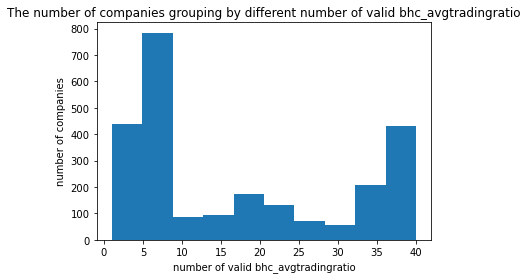

In [8]:
plt.hist(df_raw["rssd9001"].value_counts().tolist())
plt.xlabel("number of valid bhc_avgtradingratio")
plt.ylabel("number of companies")
plt.title("The number of companies grouping by different number of valid bhc_avgtradingratio")
plt.savefig("The number of companies grouping by different number of valid bhc_avgtradingratio")

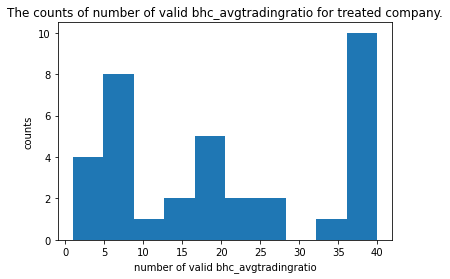

In [6]:
df = df_raw[df_raw['treat_3_b_avg']==1]
plt.hist(df["rssd9001"].value_counts().tolist())
plt.xlabel("number of valid bhc_avgtradingratio")
plt.ylabel("counts")
plt.title("The counts of number of valid bhc_avgtradingratio for treated company.")
plt.savefig("The counts of number of valid bhc_avgtradingratio for treated company.")

In [51]:
count = df_raw.groupby("rssd9001").agg('count')
rssd_40 = count[count['rssd9999']==40].index.tolist()
print(rssd_40)
df_40 = df_raw[df_raw["rssd9001"].isin(rssd_40)]

[1020180.0, 1020902.0, 1022764.0, 1023239.0, 1025309.0, 1025541.0, 1025608.0, 1026801.0, 1027004.0, 1027518.0, 1029222.0, 1029464.0, 1030170.0, 1030947.0, 1031449.0, 1032464.0, 1037003.0, 1039502.0, 1048764.0, 1048773.0, 1048812.0, 1048867.0, 1048894.0, 1049341.0, 1049828.0, 1050646.0, 1050712.0, 1052220.0, 1053272.0, 1053496.0, 1053580.0, 1054514.0, 1055007.0, 1056161.0, 1058398.0, 1059715.0, 1060328.0, 1060627.0, 1061679.0, 1062621.0, 1064278.0, 1064728.0, 1066209.0, 1066713.0, 1068025.0, 1068191.0, 1069778.0, 1070345.0, 1070420.0, 1070448.0, 1070578.0, 1070644.0, 1070765.0, 1070804.0, 1070831.0, 1071191.0, 1071276.0, 1071306.0, 1071397.0, 1071669.0, 1073757.0, 1074156.0, 1075612.0, 1075694.0, 1075984.0, 1076002.0, 1076217.0, 1076262.0, 1076431.0, 1076691.0, 1078529.0, 1078846.0, 1079562.0, 1080595.0, 1081118.0, 1081239.0, 1081538.0, 1081716.0, 1082067.0, 1082209.0, 1082777.0, 1083783.0, 1085013.0, 1085170.0, 1085509.0, 1086131.0, 1086533.0, 1086654.0, 1090987.0, 1094314.0, 1094640.0

       rssd9001    rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  \
1451  1039502.0  20040930.0             0.235039            1.0          0.0   
1452  1039502.0  20041231.0             0.251247            1.0          0.0   
1453  1039502.0  20050331.0             0.254006            1.0          0.0   
1454  1039502.0  20050630.0             0.251873            1.0          0.0   
1455  1039502.0  20050930.0             0.249962            1.0          0.0   
1456  1039502.0  20051231.0             0.241241            1.0          0.0   
1457  1039502.0  20060331.0             0.249551            1.0          0.0   
1458  1039502.0  20060630.0             0.257517            1.0          0.0   
1459  1039502.0  20060930.0             0.258023            1.0          0.0   
1460  1039502.0  20061231.0             0.269020            1.0          0.0   
1461  1039502.0  20070331.0             0.280388            1.0          0.0   
1462  1039502.0  20070630.0             

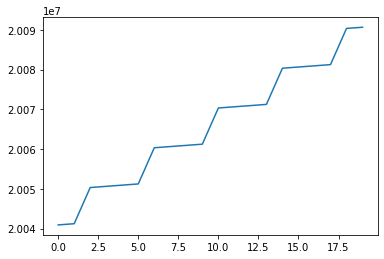

In [55]:
df_40_bhc_t_b = df_40[(df_40["bhc_avgtradingratio"]>0) & (df_40["treat_3_b_avg"]==1) & (df_40["after_DFA_1"]==0)]
rssd_40_bhc_t_b =df_40_bhc_t_b["rssd9001"].unique()
d1 = df_40_bhc_t_b[df_40_bhc_t_b["rssd9001"]==rssd_40_bhc_t_b[0]]
print(d1)
plt.plot(range(len(d1)),d1["rssd9999"])

## Data Feature After Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [6]:
df_before_PSM = pd.read_csv("df_before_PSM.csv")
print(len(df_before_PSM))
print(df_before_PSM.head())

26080
   rssd9001    rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  \
0   1020180  20040930.0                  0.0            0.0          0.0   
1   1020180  20041231.0                  0.0            0.0          0.0   
2   1020180  20050331.0                  0.0            0.0          0.0   
3   1020180  20050630.0                  0.0            0.0          0.0   
4   1020180  20050930.0                  0.0            0.0          0.0   

   dep_roa1  dep_leverage  dep_lnassets  dep_creditrisk_total3   dep_cir  \
0  0.002772      0.081957     15.601202               0.013304  0.463811   
1  0.003045      0.082480     15.630583               0.009732  0.456392   
2  0.002616      0.082074     15.644925               0.011830  0.444011   
3  0.002647      0.081712     15.679702               0.013654  0.433771   
4  0.002867      0.082944     15.661868               0.012456  0.400985   

   dep_depositratio  dep_loans_REratio  dep_liquidity  dep_cpp_bankquarter  
0  

In [5]:
df_after_PSM = pd.read_csv("df_after_PSM.csv")
print(len(df_after_PSM))
print(df_after_PSM.head())

1600
    rssd9001    rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  \
0  1039502.0  20040930.0             0.235039            1.0          0.0   
1  1039502.0  20041231.0             0.251247            1.0          0.0   
2  1039502.0  20050331.0             0.254006            1.0          0.0   
3  1039502.0  20050630.0             0.251873            1.0          0.0   
4  1039502.0  20050930.0             0.249962            1.0          0.0   

   dep_roa1  dep_leverage  dep_lnassets  dep_creditrisk_total3   dep_cir  \
0  0.001450      0.077595     20.852951               0.019520  0.559893   
1  0.001451      0.092131     20.869310               0.018247  0.539865   
2  0.001939      0.090340     20.887342               0.017743  0.498619   
3  0.000846      0.089686     20.881365               0.017612  0.581872   
4  0.002129      0.089087     20.908112               0.018822  0.447572   

   dep_depositratio  dep_loans_REratio  dep_liquidity  dep_cpp_bankquarter 

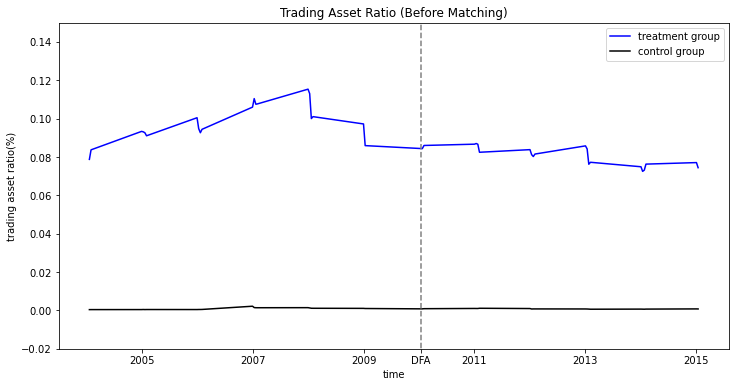

In [42]:
## before matching
df0 = df_before_PSM[df_before_PSM["treat_3_b_avg"] == 0]
df1 = df_before_PSM[df_before_PSM["treat_3_b_avg"] == 1]
t_bhc = df1.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
c_bhc = df0.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
quarter = df_before_PSM["rssd9999"].unique()

plt.figure(figsize=(12, 6))
plt.plot(quarter,t_bhc,c="blue",label="treatment group")
plt.plot(quarter,c_bhc,c="black",label="control group")
plt.plot([20100721,20100721],[-0.1,0.2],c="grey",linestyle="--")
plt.ylim(ymin = -0.02,ymax=0.15)
plt.xticks(ticks=[20050331,20070331,20090331,20100721,20110331,20130331,20150331],labels=['2005','2007','2009','DFA','2011','2013','2015']) 
plt.legend()
plt.xlabel("time")
plt.ylabel("trading asset ratio(%)")
plt.title("Trading Asset Ratio (Before Matching)")
plt.savefig("Trading Asset Ratio (Before Matching)")
plt.show()

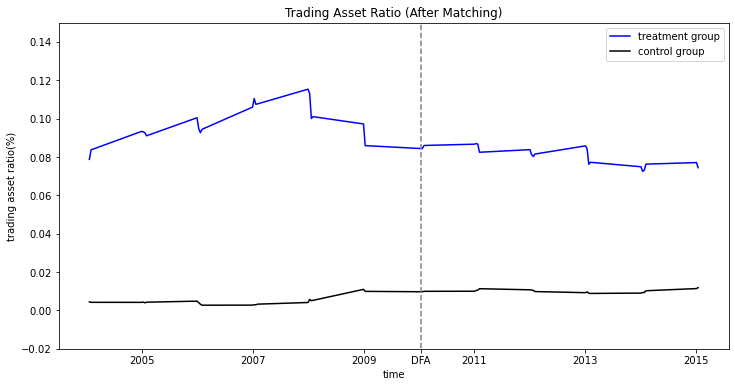

In [45]:
## after matching
df0_m = df_after_PSM[df_after_PSM["treat_3_b_avg"] == 0]
df1_m = df_after_PSM[df_after_PSM["treat_3_b_avg"] == 1]
t_bhc_m = df1_m.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
c_bhc_m = df0_m.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
quarter = df_after_PSM["rssd9999"].unique()

plt.figure(figsize=(12, 6))
plt.plot(quarter,t_bhc_m,c="blue",label="treatment group")
plt.plot(quarter,c_bhc_m,c="black",label="control group")
plt.plot([20100721,20100721],[-0.1,0.2],c="grey",linestyle="--")
plt.ylim(ymin = -0.02,ymax=0.15)
plt.xticks(ticks=[20050331,20070331,20090331,20100721,20110331,20130331,20150331],labels=['2005','2007','2009','DFA','2011','2013','2015']) 
plt.legend()
plt.xlabel("time")
plt.ylabel("trading asset ratio(%)")
plt.title("Trading Asset Ratio (After Matching)")
plt.savefig("Trading Asset Ratio (After Matching)")
plt.show()

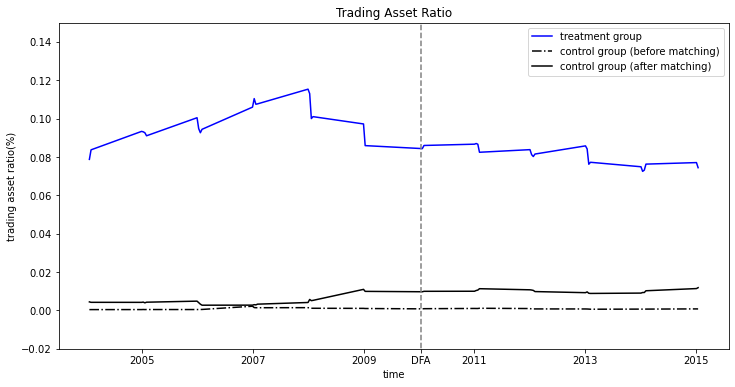

In [46]:
## before & after matching
df0 = df_before_PSM[df_before_PSM["treat_3_b_avg"] == 0]
df1 = df_before_PSM[df_before_PSM["treat_3_b_avg"] == 1]
t_bhc = df1.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
c_bhc = df0.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
df0_m = df_after_PSM[df_after_PSM["treat_3_b_avg"] == 0]
df1_m = df_after_PSM[df_after_PSM["treat_3_b_avg"] == 1]
t_bhc_m = df1_m.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
c_bhc_m = df0_m.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
quarter = df_after_PSM["rssd9999"].unique()

plt.figure(figsize=(12, 6))
plt.plot(quarter,t_bhc,c="blue",label="treatment group")
plt.plot(quarter,c_bhc,c="black",linestyle = "-.",label="control group (before matching)")
plt.plot(quarter,c_bhc_m,c="black",label="control group (after matching)")
plt.plot([20100721,20100721],[-0.1,0.2],c="grey",linestyle="--")
plt.ylim(ymin = -0.02,ymax=0.15)
plt.xticks(ticks=[20050331,20070331,20090331,20100721,20110331,20130331,20150331],labels=['2005','2007','2009','DFA','2011','2013','2015']) 
plt.legend()
plt.xlabel("time")
plt.ylabel("trading asset ratio(%)")
plt.title("Trading Asset Ratio")
plt.savefig("Trading Asset Ratio")
plt.show()

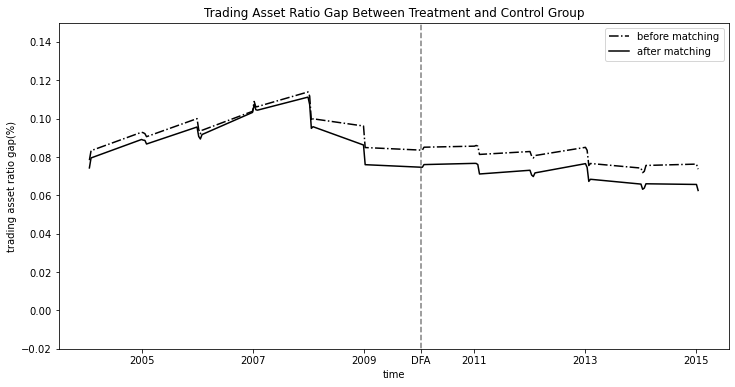

In [47]:
# gap changes
gap0 = t_bhc - c_bhc
# gap1 = t_bhc_m - c_bhc_m
# print(t_bhc)
plt.figure(figsize=(12, 6))
plt.plot(quarter,gap0,c="black",linestyle = "-.",label="before matching")
plt.plot(quarter,gap1,c="black",label="after matching")
plt.ylim(ymin = -0.02,ymax=0.15)
plt.plot([20100721,20100721],[-0.1,0.2],c="grey",linestyle="--")
plt.xticks(ticks=[20050331,20070331,20090331,20100721,20110331,20130331,20150331],labels=['2005','2007','2009','DFA','2011','2013','2015']) 
plt.xlabel("time")
plt.ylabel("trading asset ratio gap(%)")
plt.title("Trading Asset Ratio Gap Between Treatment and Control Group")
plt.legend()
plt.savefig("Trading Asset Ratio Gap Between Treatment and Control Group")
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


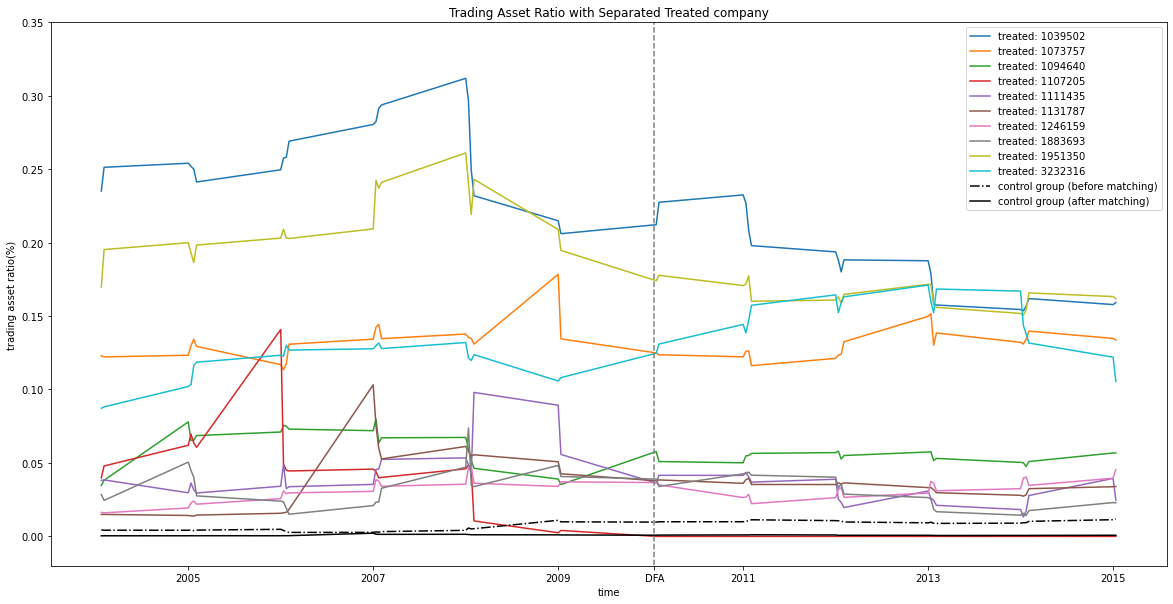

In [48]:
## separate treated company
df0 = df_before_PSM[df_before_PSM["treat_3_b_avg"] == 0]
df0_m = df_after_PSM[df_after_PSM["treat_3_b_avg"] == 0]
df1 = df_before_PSM[df_before_PSM["treat_3_b_avg"] == 1]
df1_m = df_after_PSM[df_before_PSM["treat_3_b_avg"] == 1]
t_bhc = df1.groupby(["rssd9001","rssd9999"])["bhc_avgtradingratio"].mean()
t_bhc_m = df1_m.groupby(["rssd9001","rssd9999"])["bhc_avgtradingratio"].mean()
c_bhc = df0.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
c_bhc_m = df0_m.groupby(["rssd9999"])["bhc_avgtradingratio"].mean()
# t_bhc_count = df1.groupby(["rssd9001"])["rssd9999"].count()
quarter = df_before_PSM["rssd9999"].unique()
company1 = df1["rssd9001"].unique()
# print(t_bhc_count)
# print(len(t_bhc))
# print(len(company1))

plt.figure(figsize=(20, 10))
for i in range(len(company1)):
    plt.plot(quarter,t_bhc[i*40:i*40+40],label="treated: "+str(company1[i]))
plt.plot(quarter,c_bhc_m,c="black",linestyle = "-.",label="control group (before matching)")
plt.plot(quarter,c_bhc,c="black",linestyle = "-",label="control group (after matching)")
plt.plot([20100721,20100721],[-0.1,0.4],c="grey",linestyle="--")
plt.ylim(ymin=-0.02,ymax=0.35)
plt.xticks(ticks=[20050331,20070331,20090331,20100721,20110331,20130331,20150331],labels=['2005','2007','2009','DFA','2011','2013','2015']) 
plt.legend()
plt.xlabel("time")
plt.ylabel("trading asset ratio(%)")
plt.title("Trading Asset Ratio with Separated Treated company")
plt.savefig("Trading Asset Ratio with Separated Treated company")
plt.show()


In [148]:
quarter_change = pd.DataFrame(df["rssd9001"].unique(),columns={"rssd9001"})
dep_name = ["dep_roa1","dep_leverage","dep_lnassets","dep_creditrisk_total3","dep_cir","dep_depositratio","dep_loans_REratio","dep_liquidity","dep_cpp_bankquarter"]
quarter_mean_std = []

for i in range(len(dep_name)):
    group_mean = df.groupby(["rssd9001"])[dep_name[i]].mean()
    group_std = df.groupby(["rssd9001"])[dep_name[i]].std()
    quarter_change[dep_name[i]+"_mean"] = group_mean.tolist()
    quarter_change[dep_name[i]+"_std"] = group_std.tolist()
    quarter_change[dep_name[i]+"_mean/std"] = quarter_change[dep_name[i]+"_mean"]/ quarter_change[dep_name[i]+"_std"]
    quarter_mean_std.append(np.mean(quarter_change[dep_name[i]+"_mean/std"]))
    
print(quarter_change)
print(quarter_mean_std)

     rssd9001  dep_roa1_mean  dep_roa1_std  dep_roa1_mean/std  \
0     1020180       0.002606      0.000368           7.090959   
1     1020676       0.001147      0.001034           1.108885   
2     1020902       0.001947      0.001616           1.204805   
3     1021682       0.004587      0.001562           2.937073   
4     1022764       0.001487      0.007436           0.199981   
..        ...            ...           ...                ...   
647   3274996      -0.000697      0.003422          -0.203644   
648   3280988       0.002050      0.002548           0.804685   
649   3297481       0.000853      0.002769           0.308098   
650   3309889       0.001290      0.001129           1.142303   
651   3320978       0.000929      0.000675           1.375479   

     dep_leverage_mean  dep_leverage_std  dep_leverage_mean/std  \
0             0.092624          0.007609              12.172140   
1             0.050215          0.004718              10.642694   
2             0.08

In [151]:
company_change = pd.DataFrame(df["rssd9999"].unique(),columns={"rssd9999"})
dep_name = ["dep_roa1","dep_leverage","dep_lnassets","dep_creditrisk_total3","dep_cir","dep_depositratio","dep_loans_REratio","dep_liquidity","dep_cpp_bankquarter"]
company_mean_std = []

for i in range(len(dep_name)):
    group_mean = df.groupby(["rssd9999"])[dep_name[i]].mean()
    group_std = df.groupby(["rssd9999"])[dep_name[i]].std()
    company_change[dep_name[i]+"_mean"] = group_mean.tolist()
    company_change[dep_name[i]+"_std"] = group_std.tolist()
    company_change[dep_name[i]+"_mean/std"] = company_change[dep_name[i]+"_mean"]/ company_change[dep_name[i]+"_std"]
    company_mean_std.append(np.mean(company_change[dep_name[i]+"_mean/std"]))
    
print(company_change)
print(company_mean_std)

      rssd9999  dep_roa1_mean  dep_roa1_std  dep_roa1_mean/std  \
0   20040930.0       0.002950      0.001981           1.489408   
1   20041231.0       0.002869      0.002296           1.249325   
2   20050331.0       0.003045      0.003594           0.847248   
3   20050630.0       0.003147      0.003098           1.015797   
4   20050930.0       0.003122      0.002520           1.239092   
5   20051231.0       0.002869      0.002514           1.141253   
6   20060331.0       0.003001      0.003188           0.941191   
7   20060630.0       0.003143      0.003303           0.951600   
8   20060930.0       0.003073      0.002563           1.199185   
9   20061231.0       0.002730      0.002355           1.159430   
10  20070331.0       0.002729      0.003333           0.818995   
11  20070630.0       0.002799      0.002555           1.095590   
12  20070930.0       0.002715      0.002581           1.052225   
13  20071231.0       0.001875      0.003644           0.514584   
14  200803

In [158]:
fixed_deci = pd.DataFrame(dep_name,columns={'dep_name'})
fixed_deci["quarter_mean/std"] = quarter_mean_std
fixed_deci["company_mean/std"] = company_mean_std
print(fixed_deci)

                dep_name  quarter_mean/std  company_mean/std
0               dep_roa1          2.204779          0.632341
1           dep_leverage          9.879336          2.681831
2           dep_lnassets         89.318648         10.542415
3  dep_creditrisk_total3          1.940507          1.074650
4                dep_cir          5.000216          3.095305
5       dep_depositratio         16.395762          5.533147
6      dep_loans_REratio         29.454430          4.724686
7          dep_liquidity          2.657614          1.175194
8    dep_cpp_bankquarter          0.591919          0.422364


In [108]:
print(df.head())

   rssd9001    rssd9999  bhc_avgtradingratio  treat_3_b_avg  after_DFA_1  \
0   1020180  20040930.0                  0.0            0.0          0.0   
1   1020180  20041231.0                  0.0            0.0          0.0   
2   1020180  20050331.0                  0.0            0.0          0.0   
3   1020180  20050630.0                  0.0            0.0          0.0   
4   1020180  20050930.0                  0.0            0.0          0.0   

   dep_roa1  dep_leverage  dep_lnassets  dep_creditrisk_total3   dep_cir  \
0  0.002772      0.081957     15.601202               0.013304  0.463811   
1  0.003045      0.082480     15.630583               0.009732  0.456392   
2  0.002616      0.082074     15.644925               0.011830  0.444011   
3  0.002647      0.081712     15.679702               0.013654  0.433771   
4  0.002867      0.082944     15.661868               0.012456  0.400985   

   dep_depositratio  dep_loans_REratio  dep_liquidity  dep_cpp_bankquarter  
0        

In [174]:
# beforeDFA: Affect
affect = df.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
df["affect"] = df["rssd9001"].apply(lambda x: affect[x])

# before2007: Affect_pre2007
df_pre2007 = df[df["rssd9999"]<=20060931]
affect_pre2007 = df_pre2007.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
df["affect_pre2007"] = df["rssd9001"].apply(lambda x: affect_pre2007[x])

# Model Regression

In [4]:
df_after_PSM = pd.read_csv("df_after_PSM.csv")
df_before_PSM = pd.read_csv("df_before_PSM.csv")

In [5]:
# df_before_PSM
# beforeDFA: Affect
affect = df_before_PSM.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
df_before_PSM["affect"] = df_before_PSM["rssd9001"].apply(lambda x: affect[x])

# before2007: Affect_pre2007
df_pre2007 = df_before_PSM[df_before_PSM["rssd9999"]<=20060931]
affect_pre2007 = df_pre2007.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
df_before_PSM["affect_pre2007"] = df_before_PSM["rssd9001"].apply(lambda x: affect_pre2007[x])


# df_after_PSM
# beforeDFA: Affect
affect = df_after_PSM.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
df_after_PSM["affect"] = df_after_PSM["rssd9001"].apply(lambda x: affect[x])

# before2007: Affect_pre2007
df_pre2007 = df_after_PSM[df_after_PSM["rssd9999"]<=20060931]
affect_pre2007 = df_pre2007.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
df_after_PSM["affect_pre2007"] = df_after_PSM["rssd9001"].apply(lambda x: affect_pre2007[x])


In [6]:
print(len(df_before_PSM))
print(len(df_after_PSM))

26080
1600


In [7]:
import statsmodels.formula.api as smf

regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.000       
Dependent Variable: bhc_avgtradingratio AIC:                -145207.0567
Date:               2021-10-26 00:15    BIC:                -145190.7188
No. Observations:   26080               Log-Likelihood:     72606.      
Df Model:           1                   F-statistic:        3.808       
Df Residuals:       26078               Prob (F-statistic): 0.0510      
R-squared:          0.000               Scale:              0.00022359  
--------------------------------------------------------------------------
                   Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------------
Intercept          0.0024     0.0001   18.3215   0.0000    0.0021   0.0027
after_DFA_1       -0.0004     0.0002   -1.9513   0.0510   -0.0007   0.0000
------------------------------------------------------------------------
Omnibus:              43278.144      Durbin-Watson:         0.082       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      26141661.751
Skew:                 11.442         Prob(JB):              0.000       
Kurtosis:             156.405        Condition No.:         3           
========================================================================

"""

In [8]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.272       
Dependent Variable: bhc_avgtradingratio AIC:                -153481.7735
Date:               2021-10-26 00:15    BIC:                -153391.9153
No. Observations:   26080               Log-Likelihood:     76752.      
Df Model:           10                  F-statistic:        976.4       
Df Residuals:       26069               Prob (F-statistic): 0.00        
R-squared:          0.272               Scale:              0.00016274  
------------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               -0.0413   0.0015 -28.2015 0.0000 -0.0441 -0.0384
after_DFA_1             -0.0020   0.0002 -11.0418 0.0000 -0.0023 -0.0016
dep_roa1                 0.0431   0.0111   3.8889 0.0001  0.0214  0.0649
dep_leverage            -0.0347   0.0023 -15.3637 0.0000 -0.0392 -0.0303
dep_lnassets             0.0044   0.0001  63.2951 0.0000  0.0043  0.0046
dep_creditrisk_total3    0.0415   0.0028  14.6055 0.0000  0.0359  0.0470
dep_cir                  0.0024   0.0002  11.9930 0.0000  0.0020  0.0028
dep_depositratio        -0.0206   0.0008 -26.8166 0.0000 -0.0221 -0.0191
dep_loans_REratio       -0.0056   0.0006  -9.8621 0.0000 -0.0068 -0.0045
dep_liquidity            0.0027   0.0017   1.5780 0.1146 -0.0007  0.0061
dep_cpp_bankquarter     -0.0011   0.0003  -3.6484 0.0003 -0.0017 -0.0005
------------------------------------------------------------------------
Omnibus:              38260.668      Durbin-Watson:         0.110       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      16537568.194
Skew:                 8.944          Prob(JB):              0.000       
Kurtosis:             125.060        Condition No.:         2025        
========================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [55]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect + after_DFA_1 * affect', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.910       
Dependent Variable: bhc_avgtradingratio AIC:                -208107.1056
Date:               2021-10-25 15:29    BIC:                -208074.4299
No. Observations:   26080               Log-Likelihood:     1.0406e+05  
Df Model:           3                   F-statistic:        8.829e+04   
Df Residuals:       26076               Prob (F-statistic): 0.00        
R-squared:          0.910               Scale:              2.0044e-05  
-------------------------------------------------------------------------
                     Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------------
Intercept           -0.0000    0.0000   -0.5502  0.5822  -0.0001   0.0001
after_DFA_1          0.0000    0.0001    0.7781  0.4365  -0.0001   0.0002
affect               1.0913    0.0028  395.4581  0.0000   1.0859   1.0967
after_DFA_1:affect  -0.1826    0.0039  -46.7823  0.0000  -0.1902  -0.1749
------------------------------------------------------------------------
Omnibus:              43017.736      Durbin-Watson:         0.561       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      99194706.806
Skew:                 10.616         Prob(JB):              0.000       
Kurtosis:             304.385        Condition No.:         184         
========================================================================

"""

In [56]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect + after_DFA_1 * affect + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.910       
Dependent Variable: bhc_avgtradingratio AIC:                -208120.5854
Date:               2021-10-25 15:29    BIC:                -208014.3893
No. Observations:   26080               Log-Likelihood:     1.0407e+05  
Df Model:           12                  F-statistic:        2.209e+04   
Df Residuals:       26067               Prob (F-statistic): 0.00        
R-squared:          0.910               Scale:              2.0026e-05  
------------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               -0.0009   0.0005  -1.7950 0.0727 -0.0020  0.0001
after_DFA_1             -0.0000   0.0001  -0.3202 0.7488 -0.0001  0.0001
affect                   1.0908   0.0030 358.4538 0.0000  1.0848  1.0967
after_DFA_1:affect      -0.1831   0.0039 -46.8715 0.0000 -0.1908 -0.1755
dep_roa1                 0.0017   0.0039   0.4414 0.6589 -0.0059  0.0093
dep_leverage             0.0011   0.0008   1.3749 0.1692 -0.0005  0.0027
dep_lnassets             0.0000   0.0000   1.2801 0.2005 -0.0000  0.0001
dep_creditrisk_total3    0.0036   0.0010   3.5759 0.0003  0.0016  0.0055
dep_cir                  0.0002   0.0001   2.8979 0.0038  0.0001  0.0003
dep_depositratio         0.0005   0.0003   1.8271 0.0677 -0.0000  0.0010
dep_loans_REratio       -0.0002   0.0002  -0.8443 0.3985 -0.0006  0.0002
dep_liquidity           -0.0010   0.0006  -1.6944 0.0902 -0.0022  0.0002
dep_cpp_bankquarter     -0.0001   0.0001  -1.1203 0.2626 -0.0003  0.0001
------------------------------------------------------------------------
Omnibus:              43070.699      Durbin-Watson:         0.562       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      99808540.175
Skew:                 10.643         Prob(JB):              0.000       
Kurtosis:             305.316        Condition No.:         2353        
========================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [237]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect + after_DFA_1 * affect', df_after_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                 Adj. R-squared:     0.945     
Dependent Variable: bhc_avgtradingratio AIC:                -9565.6802
Date:               2021-10-24 22:58    BIC:                -9544.1692
No. Observations:   1600                Log-Likelihood:     4786.8    
Df Model:           3                   F-statistic:        9177.     
Df Residuals:       1596                Prob (F-statistic): 0.00      
R-squared:          0.945               Scale:              0.00014791
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.0024   0.0005  -4.8585 0.0000 -0.0034 -0.0014
after_DFA_1            0.0048   0.0007   6.8709 0.0000  0.0034  0.0062
affect                 1.0981   0.0086 128.2213 0.0000  1.0813  1.1149
after_DFA_1:affect    -0.1962   0.0121 -16.2030 0.0000 -0.2200 -0.1725
----------------------------------------------------------------------
Omnibus:              497.181        Durbin-Watson:           0.363   
Prob(Omnibus):        0.000          Jarque-Bera (JB):        6957.776
Skew:                 1.053          Prob(JB):                0.000   
Kurtosis:             12.997         Condition No.:           52      
======================================================================

"""

In [231]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect + after_DFA_1 * affect + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_after_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                 Adj. R-squared:     0.947     
Dependent Variable: bhc_avgtradingratio AIC:                -9620.9882
Date:               2021-10-24 22:42    BIC:                -9551.0773
No. Observations:   1600                Log-Likelihood:     4823.5    
Df Model:           12                  F-statistic:        2395.     
Df Residuals:       1587                Prob (F-statistic): 0.00      
R-squared:          0.948               Scale:              0.00014208
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.0065   0.0047  -1.3818 0.1672 -0.0157  0.0027
after_DFA_1            0.0025   0.0008   3.1452 0.0017  0.0009  0.0040
affect                 1.1046   0.0099 111.3525 0.0000  1.0852  1.1241
after_DFA_1:affect    -0.2078   0.0120 -17.2592 0.0000 -0.2314 -0.1842
dep_roa1              -0.0078   0.0879  -0.0889 0.9291 -0.1802  0.1645
dep_leverage           0.0173   0.0113   1.5245 0.1276 -0.0050  0.0396
dep_lnassets          -0.0000   0.0002  -0.1398 0.8889 -0.0004  0.0004
dep_creditrisk_total3  0.0512   0.0114   4.5107 0.0000  0.0290  0.0735
dep_cir                0.0015   0.0005   2.9774 0.0030  0.0005  0.0025
dep_depositratio       0.0050   0.0026   1.9555 0.0507 -0.0000  0.0101
dep_loans_REratio     -0.0039   0.0023  -1.7025 0.0889 -0.0084  0.0006
dep_liquidity          0.0005   0.0077   0.0701 0.9441 -0.0145  0.0155
dep_cpp_bankquarter    0.0048   0.0009   5.0224 0.0000  0.0029  0.0066
----------------------------------------------------------------------
Omnibus:              533.121        Durbin-Watson:           0.391   
Prob(Omnibus):        0.000          Jarque-Bera (JB):        9004.187
Skew:                 1.101          Prob(JB):                0.000   
Kurtosis:             14.411         Condition No.:           5439    
======================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [238]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect_pre2007 + after_DFA_1 * affect_pre2007', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:               OLS                  Adj. R-squared:      0.872       
Dependent Variable:  bhc_avgtradingratio  AIC:                 -198860.0393
Date:                2021-10-24 23:00     BIC:                 -198827.3636
No. Observations:    26080                Log-Likelihood:      99434.      
Df Model:            3                    F-statistic:         5.934e+04   
Df Residuals:        26076                Prob (F-statistic):  0.00        
R-squared:           0.872                Scale:               2.8573e-05  
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   0.0005   0.0000   9.6622 0.0000  0.0004  0.0005
after_DFA_1                 0.0000   0.0001   0.5373 0.5911 -0.0001  0.0002
affect_pre2007              1.0505   0.0032 330.1421 0.0000  1.0443  1.0568
after_DFA_1:affect_pre2007 -0.2147   0.0045 -47.7169 0.0000 -0.2236 -0.2059
---------------------------------------------------------------------------
Omnibus:               39705.450       Durbin-Watson:          0.398       
Prob(Omnibus):         0.000           Jarque-Bera (JB):       60430825.810
Skew:                  9.065           Prob(JB):               0.000       
Kurtosis:              238.122         Condition No.:          178         
===========================================================================

"""

In [239]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect_pre2007 + after_DFA_1 * affect_pre2007', df_after_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                  Adj. R-squared:      0.914     
Dependent Variable:    bhc_avgtradingratio  AIC:                 -8853.5202
Date:                  2021-10-24 23:00     BIC:                 -8832.0092
No. Observations:      1600                 Log-Likelihood:      4430.8    
Df Model:              3                    F-statistic:         5689.     
Df Residuals:          1596                 Prob (F-statistic):  0.00      
R-squared:             0.914                Scale:               0.00023083
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   0.0011   0.0006   1.8597 0.0631 -0.0001  0.0023
after_DFA_1                 0.0055   0.0008   6.4931 0.0000  0.0038  0.0072
affect_pre2007              1.0430   0.0101 103.3581 0.0000  1.0233  1.0628
after_DFA_1:affect_pre2007 -0.2367   0.0143 -16.5873 0.0000 -0.2647 -0.2087
---------------------------------------------------------------------------
Omnibus:                 234.946         Durbin-Watson:            0.260   
Prob(Omnibus):           0.000           Jarque-Bera (JB):         2973.881
Skew:                    0.187           Prob(JB):                 0.000   
Kurtosis:                9.668           Condition No.:            49      
===========================================================================

"""

In [234]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect_pre2007 + after_DFA_1 * affect_pre2007 + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:               OLS                  Adj. R-squared:      0.876       
Dependent Variable:  bhc_avgtradingratio  AIC:                 -199719.6862
Date:                2021-10-24 22:42     BIC:                 -199613.4901
No. Observations:    26080                Log-Likelihood:      99873.      
Df Model:            12                   F-statistic:         1.541e+04   
Df Residuals:        26067                Prob (F-statistic):  0.00        
R-squared:           0.876                Scale:               2.7637e-05  
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  -0.0084   0.0006 -13.7798 0.0000 -0.0096 -0.0072
after_DFA_1                -0.0003   0.0001  -3.9526 0.0001 -0.0004 -0.0001
affect_pre2007              1.0148   0.0034 299.3911 0.0000  1.0081  1.0214
after_DFA_1:affect_pre2007 -0.2147   0.0044 -48.4642 0.0000 -0.2234 -0.2060
dep_roa1                    0.0038   0.0046   0.8416 0.4000 -0.0051  0.0128
dep_leverage               -0.0010   0.0009  -1.0173 0.3090 -0.0028  0.0009
dep_lnassets                0.0007   0.0000  22.6217 0.0000  0.0006  0.0008
dep_creditrisk_total3       0.0109   0.0012   9.2734 0.0000  0.0086  0.0132
dep_cir                     0.0006   0.0001   7.5808 0.0000  0.0005  0.0008
dep_depositratio           -0.0019   0.0003  -5.9613 0.0000 -0.0025 -0.0013
dep_loans_REratio           0.0001   0.0002   0.3014 0.7631 -0.0004  0.0005
dep_liquidity              -0.0017   0.0007  -2.3803 0.0173 -0.0031 -0.0003
dep_cpp_bankquarter        -0.0004   0.0001  -3.6260 0.0003 -0.0007 -0.0002
---------------------------------------------------------------------------
Omnibus:               40112.492       Durbin-Watson:          0.414       
Prob(Omnibus):         0.000           Jarque-Bera (JB):       64878656.161
Skew:                  9.242           Prob(JB):               0.000       
Kurtosis:              246.645         Condition No.:          2265        
===========================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [235]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + affect_pre2007 + after_DFA_1 * affect_pre2007 + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_after_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                  Adj. R-squared:      0.931     
Dependent Variable:    bhc_avgtradingratio  AIC:                 -9179.5455
Date:                  2021-10-24 22:42     BIC:                 -9109.6346
No. Observations:      1600                 Log-Likelihood:      4602.8    
Df Model:              12                   F-statistic:         1785.     
Df Residuals:          1587                 Prob (F-statistic):  0.00      
R-squared:             0.931                Scale:               0.00018723
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  -0.0522   0.0054  -9.6825 0.0000 -0.0628 -0.0416
after_DFA_1                 0.0014   0.0009   1.6321 0.1028 -0.0003  0.0032
affect_pre2007              1.0009   0.0104  96.3608 0.0000  0.9805  1.0213
after_DFA_1:affect_pre2007 -0.2472   0.0130 -19.0382 0.0000 -0.2727 -0.2218
dep_roa1                    0.0750   0.1009   0.7437 0.4572 -0.1229  0.2730
dep_leverage                0.0313   0.0130   2.3983 0.0166  0.0057  0.0569
dep_lnassets                0.0026   0.0002  11.1654 0.0000  0.0021  0.0030
dep_creditrisk_total3       0.0967   0.0130   7.4247 0.0000  0.0711  0.1222
dep_cir                     0.0035   0.0006   6.1106 0.0000  0.0024  0.0047
dep_depositratio           -0.0011   0.0030  -0.3864 0.6992 -0.0069  0.0047
dep_loans_REratio           0.0007   0.0026   0.2823 0.7777 -0.0044  0.0059
dep_liquidity               0.0108   0.0088   1.2267 0.2201 -0.0064  0.0280
dep_cpp_bankquarter         0.0021   0.0011   1.8918 0.0587 -0.0001  0.0042
---------------------------------------------------------------------------
Omnibus:                 306.312         Durbin-Watson:            0.345   
Prob(Omnibus):           0.000           Jarque-Bera (JB):         3445.484
Skew:                    0.547           Prob(JB):                 0.000   
Kurtosis:                10.105          Condition No.:            5441    
===========================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [240]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                OLS                 Adj. R-squared:     0.533       
Dependent Variable:   bhc_avgtradingratio AIC:                -165046.0333
Date:                 2021-10-24 23:01    BIC:                -165013.3576
No. Observations:     26080               Log-Likelihood:     82527.      
Df Model:             3                   F-statistic:        9912.       
Df Residuals:         26076               Prob (F-statistic): 0.00        
R-squared:            0.533               Scale:              0.00010448  
--------------------------------------------------------------------------
                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  0.0009   0.0001  10.0998 0.0000  0.0007  0.0011
after_DFA_1               -0.0001   0.0001  -0.7567 0.4492 -0.0003  0.0002
treat_3_b_avg              0.0970   0.0007 133.1949 0.0000  0.0956  0.0984
after_DFA_1:treat_3_b_avg -0.0173   0.0010 -16.7613 0.0000 -0.0193 -0.0152
--------------------------------------------------------------------------
Omnibus:              31194.623       Durbin-Watson:          0.136       
Prob(Omnibus):        0.000           Jarque-Bera (JB):       13934289.866
Skew:                 5.903           Prob(JB):               0.000       
Kurtosis:             115.621         Condition No.:          21          
==========================================================================

"""

In [241]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg', df_after_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:               OLS                  Adj. R-squared:      0.464     
Dependent Variable:  bhc_avgtradingratio  AIC:                 -5921.1566
Date:                2021-10-24 23:02     BIC:                 -5899.6456
No. Observations:    1600                 Log-Likelihood:      2964.6    
Df Model:            3                    F-statistic:         463.3     
Df Residuals:        1596                 Prob (F-statistic):  1.81e-216 
R-squared:           0.465                Scale:               0.0014429 
-------------------------------------------------------------------------
                           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                  0.0059   0.0016  3.7889 0.0002  0.0028  0.0089
after_DFA_1                0.0047   0.0022  2.1599 0.0309  0.0004  0.0090
treat_3_b_avg              0.0921   0.0031 29.6802 0.0000  0.0860  0.0981
after_DFA_1:treat_3_b_avg -0.0221   0.0044 -5.0384 0.0000 -0.0307 -0.0135
-------------------------------------------------------------------------
Omnibus:               531.893         Durbin-Watson:            0.058   
Prob(Omnibus):         0.000           Jarque-Bera (JB):         2701.770
Skew:                  1.479           Prob(JB):                 0.000   
Kurtosis:              8.637           Condition No.:            7       
=========================================================================

"""

In [232]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_before_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                OLS                 Adj. R-squared:     0.588       
Dependent Variable:   bhc_avgtradingratio AIC:                -168322.6942
Date:                 2021-10-24 22:42    BIC:                -168216.4982
No. Observations:     26080               Log-Likelihood:     84174.      
Df Model:             12                  F-statistic:        3103.       
Df Residuals:         26067               Prob (F-statistic): 0.00        
R-squared:            0.588               Scale:              9.2116e-05  
--------------------------------------------------------------------------
                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                 -0.0290   0.0011 -26.2233 0.0000 -0.0311 -0.0268
after_DFA_1               -0.0011   0.0001  -7.8839 0.0000 -0.0013 -0.0008
treat_3_b_avg              0.0844   0.0007 116.3033 0.0000  0.0829  0.0858
after_DFA_1:treat_3_b_avg -0.0168   0.0010 -17.3601 0.0000 -0.0187 -0.0149
dep_roa1                   0.0202   0.0083   2.4227 0.0154  0.0039  0.0366
dep_leverage              -0.0184   0.0017 -10.7729 0.0000 -0.0217 -0.0150
dep_lnassets               0.0025   0.0001  45.0705 0.0000  0.0023  0.0026
dep_creditrisk_total3      0.0236   0.0021  11.0242 0.0000  0.0194  0.0278
dep_cir                    0.0012   0.0002   7.9432 0.0000  0.0009  0.0015
dep_depositratio          -0.0091   0.0006 -15.6338 0.0000 -0.0103 -0.0080
dep_loans_REratio          0.0030   0.0004   6.8114 0.0000  0.0021  0.0038
dep_liquidity             -0.0018   0.0013  -1.4028 0.1607 -0.0044  0.0007
dep_cpp_bankquarter        0.0000   0.0002   0.0222 0.9823 -0.0004  0.0004
--------------------------------------------------------------------------
Omnibus:              31476.423       Durbin-Watson:          0.155       
Prob(Omnibus):        0.000           Jarque-Bera (JB):       14617483.707
Skew:                 5.993           Prob(JB):               0.000       
Kurtosis:             118.360         Condition No.:          2025        
==========================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [233]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', df_after_PSM).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                OLS                  Adj. R-squared:      0.677     
Dependent Variable:   bhc_avgtradingratio  AIC:                 -6722.5205
Date:                 2021-10-24 22:42     BIC:                 -6652.6096
No. Observations:     1600                 Log-Likelihood:      3374.3    
Df Model:             12                   F-statistic:         280.6     
Df Residuals:         1587                 Prob (F-statistic):  0.00      
R-squared:            0.680                Scale:               0.00086954
--------------------------------------------------------------------------
                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                 -0.1548   0.0124 -12.5103 0.0000 -0.1790 -0.1305
after_DFA_1                0.0009   0.0020   0.4604 0.6453 -0.0030  0.0048
treat_3_b_avg              0.0881   0.0027  32.2561 0.0000  0.0827  0.0934
after_DFA_1:treat_3_b_avg -0.0192   0.0035  -5.5100 0.0000 -0.0261 -0.0124
dep_roa1                  -0.2431   0.2174  -1.1183 0.2636 -0.6695  0.1833
dep_leverage              -0.1625   0.0276  -5.8761 0.0000 -0.2167 -0.1082
dep_lnassets               0.0095   0.0005  18.9898 0.0000  0.0085  0.0105
dep_creditrisk_total3      0.1028   0.0281   3.6640 0.0003  0.0478  0.1578
dep_cir                    0.0028   0.0013   2.2267 0.0261  0.0003  0.0052
dep_depositratio          -0.0128   0.0065  -1.9659 0.0495 -0.0255 -0.0000
dep_loans_REratio          0.0195   0.0059   3.3254 0.0009  0.0080  0.0310
dep_liquidity             -0.0265   0.0192  -1.3806 0.1676 -0.0643  0.0112
dep_cpp_bankquarter        0.0068   0.0024   2.8566 0.0043  0.0021  0.0114
--------------------------------------------------------------------------
Omnibus:                533.965         Durbin-Watson:            0.095   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         3443.690
Skew:                   1.403           Prob(JB):                 0.000   
Kurtosis:               9.617           Condition No.:            5440    
==========================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [11]:
# Model Regression for different company groups
cmp11 = pd.read_csv("cmp11.csv")
cmp22 = pd.read_csv("cmp22.csv")
print(len(cmp11),len(cmp22))

# beforeDFA: Affect
affect = cmp11.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
cmp11["affect"] = cmp11["rssd9001"].apply(lambda x: affect[x])

affect = cmp22.groupby(["rssd9001"])['bhc_avgtradingratio'].mean()
cmp22["affect"] = cmp22["rssd9001"].apply(lambda x: affect[x])


960 640


In [14]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', cmp11).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:               OLS                  Adj. R-squared:      0.695     
Dependent Variable:  bhc_avgtradingratio  AIC:                 -6024.0148
Date:                2021-10-26 00:22     BIC:                 -5960.7447
No. Observations:    960                  Log-Likelihood:      3025.0    
Df Model:            12                   F-statistic:         182.9     
Df Residuals:        947                  Prob (F-statistic):  7.76e-237 
R-squared:           0.699                Scale:               0.00010876
-------------------------------------------------------------------------
                           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 -0.0553   0.0068 -8.1374 0.0000 -0.0686 -0.0419
after_DFA_1               -0.0031   0.0010 -3.1396 0.0017 -0.0051 -0.0012
treat_3_b_avg              0.0425   0.0013 33.2813 0.0000  0.0400  0.0450
after_DFA_1:treat_3_b_avg -0.0137   0.0016 -8.5564 0.0000 -0.0169 -0.0106
dep_roa1                   0.9724   0.1520  6.3951 0.0000  0.6740  1.2708
dep_leverage              -0.0520   0.0117 -4.4488 0.0000 -0.0750 -0.0291
dep_lnassets               0.0025   0.0003  9.1171 0.0000  0.0020  0.0031
dep_creditrisk_total3      0.1836   0.0245  7.4950 0.0000  0.1355  0.2316
dep_cir                    0.0158   0.0024  6.6462 0.0000  0.0111  0.0205
dep_depositratio          -0.0037   0.0031 -1.1690 0.2427 -0.0098  0.0025
dep_loans_REratio          0.0147   0.0023  6.4518 0.0000  0.0102  0.0192
dep_liquidity              0.0109   0.0075  1.4560 0.1457 -0.0038  0.0257
dep_cpp_bankquarter        0.0013   0.0011  1.2384 0.2159 -0.0008  0.0034
-------------------------------------------------------------------------
Omnibus:               400.647         Durbin-Watson:            0.553   
Prob(Omnibus):         0.000           Jarque-Bera (JB):         8353.234
Skew:                  1.391           Prob(JB):                 0.000   
Kurtosis:              17.181          Condition No.:            7870    
=========================================================================
* The condition number is large (8e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [15]:
regout = smf.ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg + dep_roa1 + dep_leverage + dep_lnassets + dep_creditrisk_total3 + dep_cir + dep_depositratio + dep_loans_REratio + dep_liquidity + dep_cpp_bankquarter', cmp22).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                OLS                  Adj. R-squared:      0.918     
Dependent Variable:   bhc_avgtradingratio  AIC:                 -3119.1051
Date:                 2021-10-26 00:22     BIC:                 -3061.1060
No. Observations:     640                  Log-Likelihood:      1572.6    
Df Model:             12                   F-statistic:         596.7     
Df Residuals:         627                  Prob (F-statistic):  0.00      
R-squared:            0.919                Scale:               0.00043875
--------------------------------------------------------------------------
                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                 -0.3736   0.0369 -10.1141 0.0000 -0.4461 -0.3011
after_DFA_1               -0.0059   0.0026  -2.2658 0.0238 -0.0110 -0.0008
treat_3_b_avg              0.1242   0.0049  25.1887 0.0000  0.1145  0.1339
after_DFA_1:treat_3_b_avg -0.0293   0.0043  -6.7824 0.0000 -0.0378 -0.0208
dep_roa1                   0.4346   0.4258   1.0207 0.3078 -0.4015  1.2707
dep_leverage              -0.1160   0.0672  -1.7248 0.0851 -0.2480  0.0161
dep_lnassets               0.0231   0.0018  12.8123 0.0000  0.0196  0.0266
dep_creditrisk_total3      0.1145   0.0575   1.9897 0.0471  0.0015  0.2274
dep_cir                    0.0018   0.0010   1.8967 0.0583 -0.0001  0.0038
dep_depositratio          -0.0581   0.0214  -2.7122 0.0069 -0.1002 -0.0160
dep_loans_REratio         -0.0854   0.0115  -7.3916 0.0000 -0.1081 -0.0627
dep_liquidity              0.0670   0.0402   1.6667 0.0961 -0.0119  0.1459
dep_cpp_bankquarter        0.0040   0.0035   1.1656 0.2442 -0.0028  0.0108
--------------------------------------------------------------------------
Omnibus:                225.656         Durbin-Watson:            0.170   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         1341.438
Skew:                   1.445           Prob(JB):                 0.000   
Kurtosis:               9.477           Condition No.:            10335   
==========================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""